<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/VGG16_Adam_20epoch_Ir%3D0_0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerekli kütüphaneleri yükleyin
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers

# Veri yolu
train_path = '/content/drive/MyDrive/Multiple Sclerosis/Split/Train'
valid_path = '/content/drive/MyDrive/Multiple Sclerosis/Split/Validation'
test_path = '/content/drive/MyDrive/Multiple Sclerosis/Split/Test'

# Veri artırımı konfigürasyonu
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

# Veri setini yükleyin ve artırın
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# VGG16 modelini kullanın
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Yeni bir model oluşturun ve VGG16 modelini ekleyin
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Modeli derleyin
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Modeli eğitin
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Modeli değerlendirin
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

accuracy = model.evaluate(test_generator)
print('Test Accuracy:', accuracy[1])

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/50
37/37 [==============================] - 777s 20s/step - loss: 1.1036 - accuracy: 0.4649 - val_loss: 0.7615 - val_accuracy: 0.5781
Epoch 2/50
37/37 [==============================] - 27s 732ms/step - loss: 0.7960 - accuracy: 0.5565 - val_loss: 0.7189 - val_accuracy: 0.6328
Epoch 3/50
37/37 [==============================] - 27s 729ms/step - loss: 0.7314 - accuracy: 0.5925 - val_loss: 0.7762 - val_accuracy: 0.5755
Epoch 4/50
37/37 [==============================] - 28s 742ms/step - loss: 0.6782 - accuracy: 0.6524 - val_loss: 0.6764 - val_accuracy: 0.6250
Epoch 5/50
37/37 [==============================] - 27s 740ms/step - loss: 0.6475 - accuracy: 0.6601 - val_loss: 0.5805 - val_accuracy: 0.7135
Epoch 6/50
37/37 [==============================] - 27s 731ms/step - loss: 0.6107 - accuracy: 0.6832 - val_loss: 0.7407 - val_accuracy: 0.

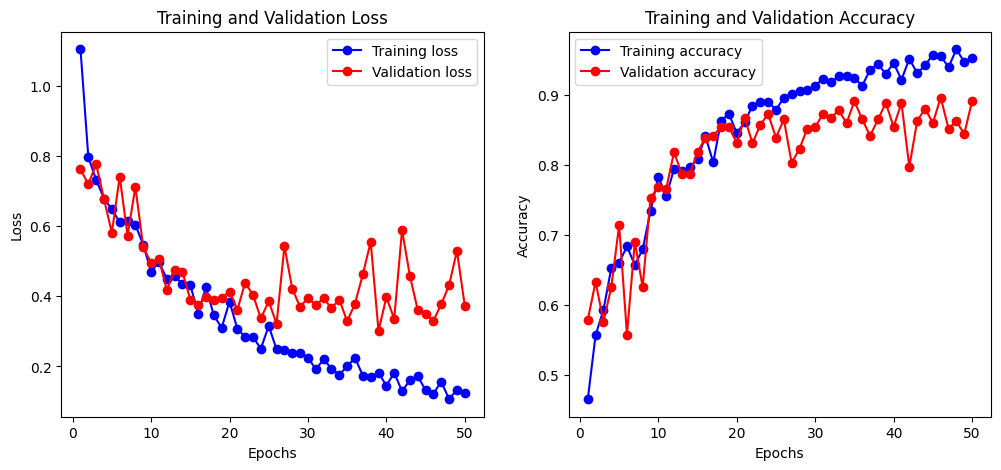

13/13 [==============================] - 7s 519ms/step


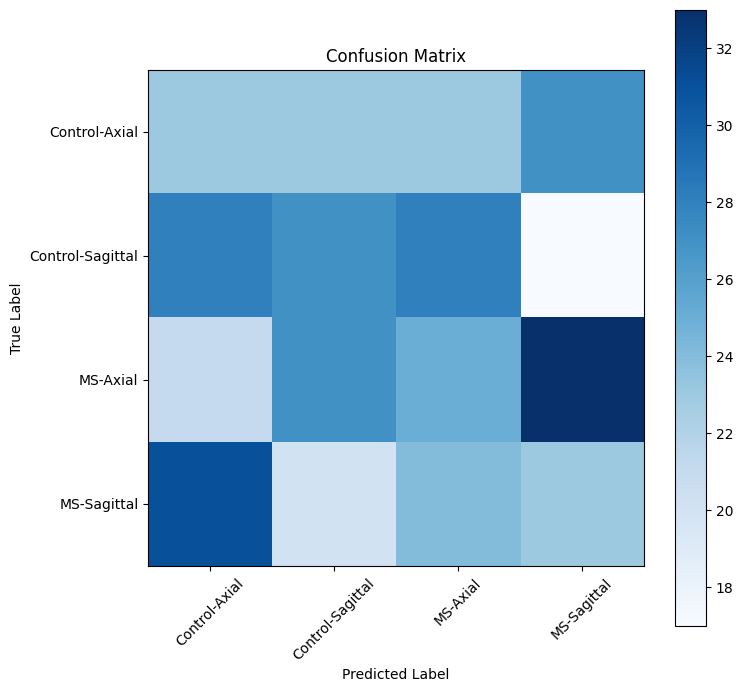

Classification Report:
                   precision    recall  f1-score   support

   Control-Axial       0.22      0.24      0.23        96
Control-Sagittal       0.28      0.27      0.27       100
        MS-Axial       0.25      0.24      0.24       106
     MS-Sagittal       0.23      0.23      0.23        98

        accuracy                           0.24       400
       macro avg       0.25      0.25      0.25       400
    weighted avg       0.25      0.24      0.25       400



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

# Eğitim sırasında konfüzyon matrisini ve eğitim/validasyon grafiğini çizmek için bir fonksiyon
def plot_confusion_matrix_and_history(history, test_generator, model):
    # Eğitim ve validasyon kayıplarını ve doğruluklarını alın
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Eğitim ve validasyon grafiğini çizin
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(12, 5))

    # Loss grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Konfüzyon matrisini çıkarın
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes

    # Sınıf etiketlerini alın
    class_labels = list(test_generator.class_indices.keys())

    # Konfüzyon matrisini çizin
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()

    # Sınıflandırma raporunu yazdırın
    print('Classification Report:\n', classification_report(y_true, y_pred, target_names=class_labels))


# Konfüzyon matrisini ve eğitim/validasyon grafiğini çizin
plot_confusion_matrix_and_history(history, test_generator, model)